In [70]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.io import readsav
from astropy.io import fits
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset

In [26]:
dpath_clusters ='/mn/stornext/d9/souvikb/K_means_results/'
dpath = '/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/'

In [27]:
cc=pickle.load(open(dpath_clusters+'kmeans_training.pickle','rb'))
cluster_mask = fits.getdata(dpath_clusters+'clusters_mask.fits',ext=0)

In [4]:
wave_H= readsav(dpath+'spectfile.6563.idlsave')
wave_H=wave_H['spect_pos']

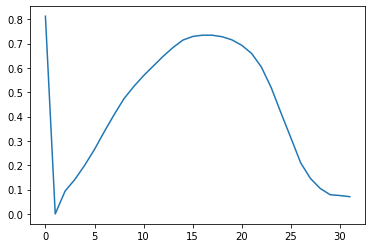

In [5]:
plt.plot(-cc[48,40:]+cc[48,41])

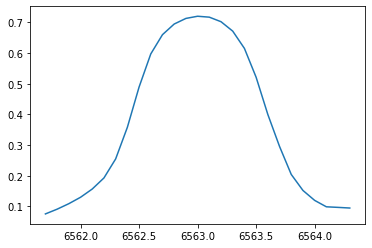

In [24]:
plt.plot(wave_H[4:31],-cc[40,45:]+cc[40,41])

In [6]:
wt_I = np.zeros((50,30))
I =wt_I*0.
lam_cog =np.zeros((50))
for centers in range(50):
    for i in range(30):
        wt_I[centers,i] = wave_H[i]*(cc[centers,41]-cc[centers,41+i])
        I[centers,i] = (cc[centers,41]-cc[centers,41+i])
    lam_cog[centers] = np.sum(wt_I[centers,:])/np.sum(I[centers,:])

In [26]:
3e5*((lam_cog[0]-lam_cog[40])/lam_cog[40])

-0.3154363868581467

In [7]:
index = np.where((lam_cog-lam_cog[40])<0)

In [8]:
index[0][:]

array([ 0,  1,  2,  3,  5,  9, 10, 11, 12, 13, 14, 19, 20, 22, 24, 25, 27,
       28, 29, 30, 31, 33, 35, 37, 42, 44, 48, 49])

In [9]:
dopp = 3e5*((lam_cog-lam_cog[40])/lam_cog[40])

In [55]:
index = np.where(dopp<=-2)

In [57]:
dopp[index[0]]

array([-2.31605035, -2.5460313 , -5.02536628, -3.9428107 , -9.91430093,
       -2.46799281])

In [58]:
index

(array([ 5, 11, 12, 25, 48, 49]),)

In [62]:
index1 = np.where(dopp>=2.)
index1[0]

array([ 8, 16, 18, 26, 36, 39, 46])

In [61]:
dopp[index1[0]]

array([3.58199542, 2.06978929, 8.65194296, 4.95801411, 3.07161296,
       2.45773386, 5.38054101])

In [28]:
#now make a movie for RPs in the same way as Fig 1. c) of your paper II. 
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

#labels=pickle.load(open(dpath_clusters+'kmeans_labels.pickle','rb'))


In [33]:
image = cluster_mask[:,:,165]
rbeim = np.full(image.shape,-1)
rreim = np.full(image.shape,-1)
restim = np.full(image.shape,-1)


In [63]:
rbe = np.array([5,49,11, 25, 12, 48,])
rre = np.array([16, 39, 8, 26, 46, 18,])
rest = np.array([0, 1, 2, 3, 4, 6, 7, 9, 10, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 40, 42, 42, 43, 44, 45, 47,])

rbe_cn = np.zeros(rbe.size,dtype='int32')
rre_cn = np.zeros(rre.size,dtype='int32')
#rest_cn = np.zeros(rest.size,dtype='int32')

In [64]:
for ii in range(rbe.size):
    ss = (image[:,:] == rbe[ii])
    rbeim[ss] = ii
    rbe_cn[ii]=ii

for ii in range(rre.size):
    ss = (image[:,:] == rre[ii])
    rreim[ss] = ii+rbe.size
    rre_cn[ii]=ii+rbe.size


In [65]:
cmap = plt.get_cmap('Blues',rbe.size)
cmap2 = truncate_colormap(cmap, 0.5, 1.0, rbe.size)

cmap = plt.get_cmap('Reds',rre.size)
cmap3 = truncate_colormap(cmap, 0.5, 1.0, rre.size)

In [66]:
mrbeim = np.ma.masked_where(rbeim < 0, rbeim)
mrreim = np.ma.masked_where(rreim < 0, rreim)

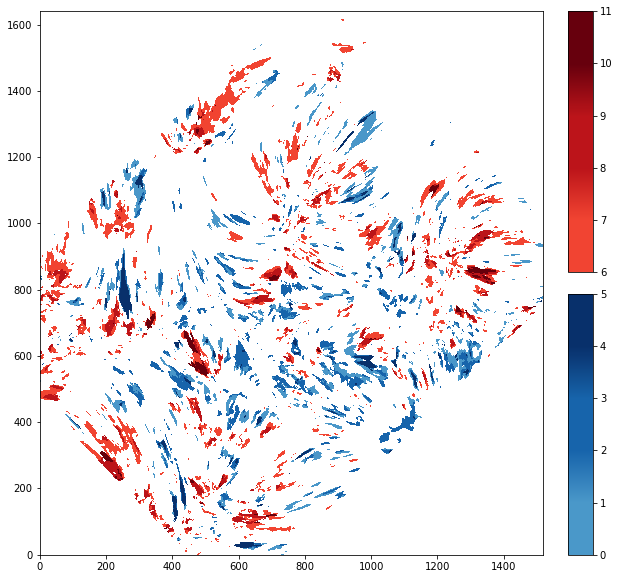

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
im1=ax.imshow(mrbeim,origin='lower',cmap=cmap2)
im2=ax.imshow(mrreim,origin='lower',cmap=cmap3)
axins_cb2 = inset_axes(ax,
                       width="5%",  # width = 5% of parent_bbox width
                       height="48%",  # height : 50%
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0., 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0,
                       )

axins_cb3 = inset_axes(ax,
                       width="5%",  # width = 5% of parent_bbox width
                       height="48%",  # height : 50%
                       loc='upper left',
                       bbox_to_anchor=(1.05, 0., 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0,
                       )

plt.colorbar(im1,cax=axins_cb2,ticks = np.arange(np.min(rbe_cn),np.max(rbe_cn)+1),orientation="vertical")
axins_cb2.xaxis.set_ticks_position("default")

#cax3 = divider.append_axes("right", size="3%", pad=0.04)
plt.colorbar(im2,cax=axins_cb3,ticks = np.arange(np.min(rre_cn),np.max(rre_cn)+1),orientation="vertical")
axins_cb3.xaxis.set_ticks_position("default")